# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Z:/csv/2008.csv")
df = df.dropna(subset=['Distance','ArrDelay'])

In [2]:
df = df[df.ArrDelay > 120]

In [3]:
df = df[df.Distance > 2000]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


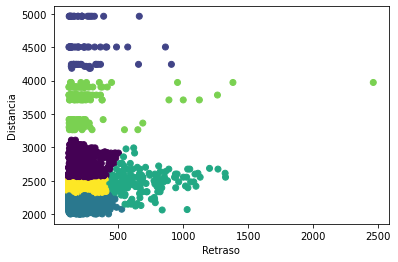

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_jobs=-1).fit(df[['ArrDelay','Distance']]) #order matters!
plt.scatter(df['ArrDelay'],df['Distance'],c=kmeans.labels_)
plt.xlabel('Retraso')
plt.ylabel('Distancia')
plt.show()

In [5]:
kmeans.cluster_centers_

array([[ 193.53163926, 2632.94419532],
       [ 248.84210526, 4549.46052632],
       [ 183.63702801, 2179.55217215],
       [ 631.65196078, 2491.92647059],
       [ 253.30487805, 3660.53658537],
       [ 189.5391989 , 2435.33926737]])

In [6]:
df['Group'] = kmeans.labels_

In [7]:
dfgroup = df[df['Group'] == 3] # this depends on the execution? because the kmeans.clester_centers_ changes every time you run it

In [8]:
dfgroup.groupby(['DayOfWeek'])['DepDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,22.0,621.727273,176.143659,381.0,464.50,586.0,712.00,1030.0
2,21.0,594.952381,271.327565,197.0,415.00,509.0,810.00,1114.0
3,31.0,627.548387,253.053860,168.0,469.00,598.0,745.50,1316.0
4,24.0,582.291667,190.011322,355.0,458.00,526.0,650.75,1103.0
5,34.0,570.941176,211.342741,-14.0,461.50,537.5,681.25,1126.0
6,34.0,644.588235,257.962543,0.0,468.75,614.5,815.50,1268.0
7,36.0,559.861111,250.755789,-2.0,442.75,530.0,616.50,1198.0


# Modelisation

In [11]:
dfgroup['Month'] = dfgroup['Month'].apply(str)
dfgroup['DayofMonth'] = dfgroup['DayofMonth'].apply(str)
dfgroup['DayOfWeek'] = dfgroup['DayOfWeek'].apply(str)

X = pd.get_dummies(dfgroup[['Month','DayofMonth','DayOfWeek','UniqueCarrier','Origin','Dest']])
X = X.add(dfgroup[['TaxiIn','TaxiOut','DepTime']],fill_value=0)

<ipython-input-11-027b4d75b0ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgroup['Month'] = dfgroup['Month'].apply(str)
<ipython-input-11-027b4d75b0ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgroup['DayofMonth'] = dfgroup['DayofMonth'].apply(str)
<ipython-input-11-027b4d75b0ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [12]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=1000,n_jobs=-1).fit(X,dfgroup['ArrDelay'])
importance = clf.feature_importances_

In [14]:
importance

array([2.73465367e-03, 6.75330087e-03, 3.29720323e-03, 3.48991325e-03,
       2.37611578e-03, 3.41289259e-03, 4.05563496e-03, 6.55866617e-04,
       8.62995529e-04, 4.45795135e-03, 8.12169936e-04, 1.15454120e-03,
       7.97834999e-04, 1.50273497e-03, 3.10822910e-03, 1.70499777e-04,
       5.77375274e-03, 3.29572577e-03, 6.07339831e-03, 1.14936227e-02,
       1.49188025e-03, 1.16254561e-03, 1.32985878e-03, 7.41780780e-04,
       1.26395120e-03, 4.05262931e-04, 1.03064079e-03, 6.85502602e-04,
       6.95734460e-03, 1.37899720e-03, 1.98099306e-02, 1.28102310e-04,
       1.41951466e-02, 8.74953014e-04, 1.48680817e-03, 1.17802251e-03,
       2.10214063e-03, 5.49152310e-03, 3.13165685e-01, 3.48983585e-04,
       5.42367986e-04, 2.75056298e-05, 8.26928703e-04, 8.26151148e-04,
       1.77591506e-05, 1.73634890e-03, 5.37986520e-02, 2.76610807e-04,
       1.13318488e-02, 1.69636569e-04, 6.14022586e-04, 1.53678963e-02,
       5.04896990e-05, 7.69843801e-05, 2.44753038e-03, 1.23941467e-02,
      

In [15]:
X.columns[importance == max(importance)]

Index(['DepTime'], dtype='object')

In [16]:
np.corrcoef(dfgroup['DepTime'],dfgroup['ArrDelay'])

array([[ 1.        , -0.21749167],
       [-0.21749167,  1.        ]])

In [ ]:
# negative correlation: the higher the value of the 1st column the lower the value of the 2nd one - this means that the flights that have a later departure time are those that have a lower delay time